<h2 style="color: blue; text-align: center; font-size: 30px;"><b>Task: Data Visualization
</b></h2>
<h4 style="color: blue; text-align: center; font-size: 30px;"><b>Level 3 : Task 3</b></h4>

### Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [7]:
data=pd.read_csv("Dataset1.csv")
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


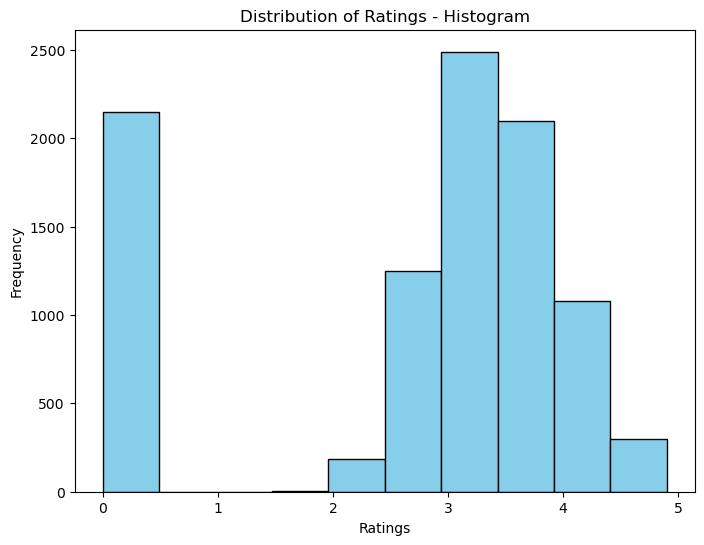

In [17]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Aggregate rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings - Histogram')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

Ratings are more between the range of 2.5 and 3.5

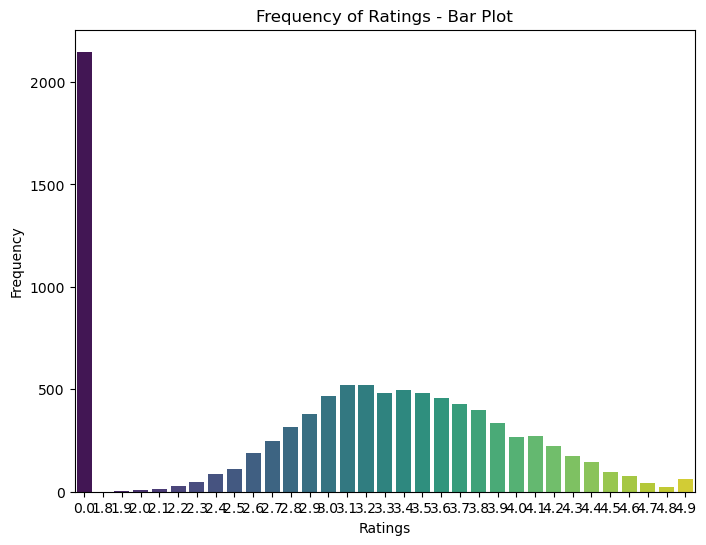

In [20]:
# Bar Plot
rating_counts = data['Aggregate rating'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Frequency of Ratings - Bar Plot')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

Most of the ratings are near to zero.

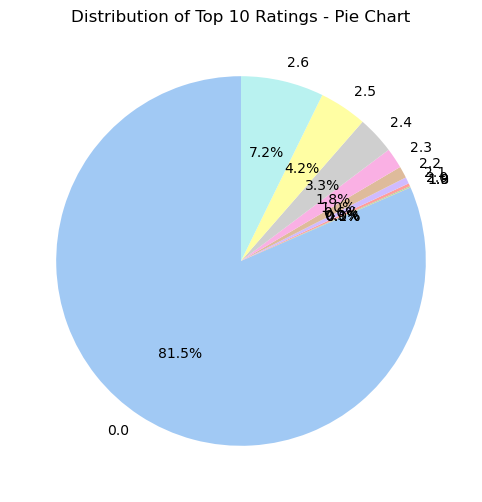

In [33]:
# Pie Chart
plt.figure(figsize=(8, 6))
# Take the first 10 rating categories
top_10_ratings = rating_counts.head(10)  
top_10_ratings.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Top 10 Ratings - Pie Chart')
plt.ylabel('')  # Hide y-axis label for aesthetics
plt.show()


### Compare the average ratings of different cuisines or cities using appropriate visualizations.

Group by the cuisine column and calculate the mean of the ratings column.

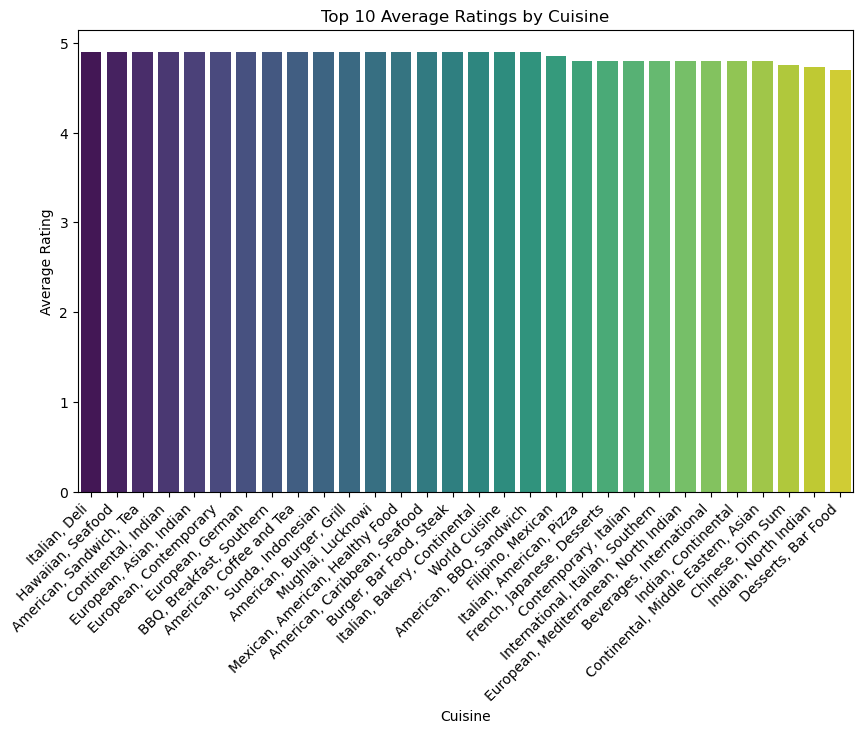

In [37]:
# Grouping data
avg_ratings_cuisine = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Take the first 10 cuisines
top_10_cuisines = avg_ratings_cuisine.head(30)

# Bar Plot for Top 10 Cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cuisines.index, y=top_10_cuisines.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Average Ratings by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.show()


In [29]:
print(data.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


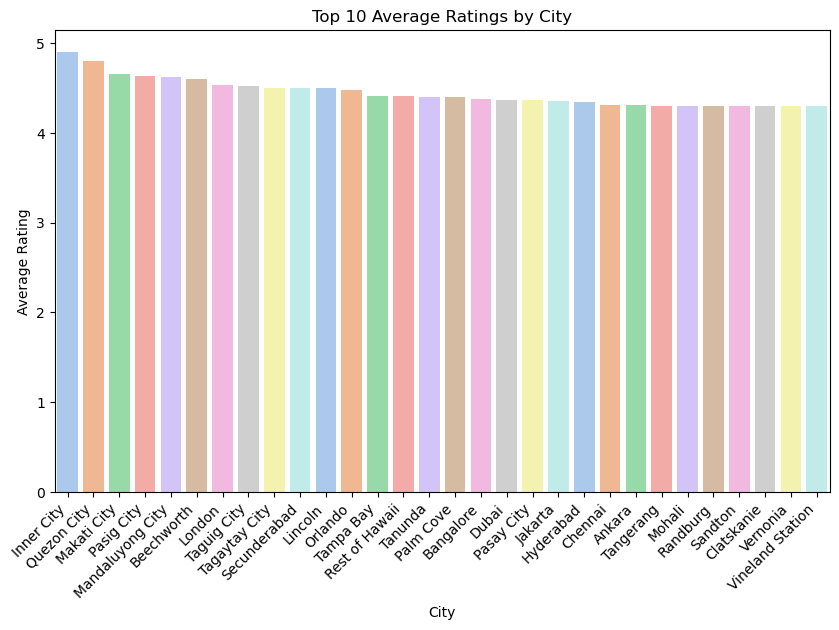

In [39]:
# Grouping data
avg_ratings_city = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Take the first 10 cities
top_10_cities = avg_ratings_city.head(30)

# Bar Plot for Top 10 Cities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()


### Visualize the relationship between various features and the target variable to gain insights.


 Price Range vs. Aggregate Rating :

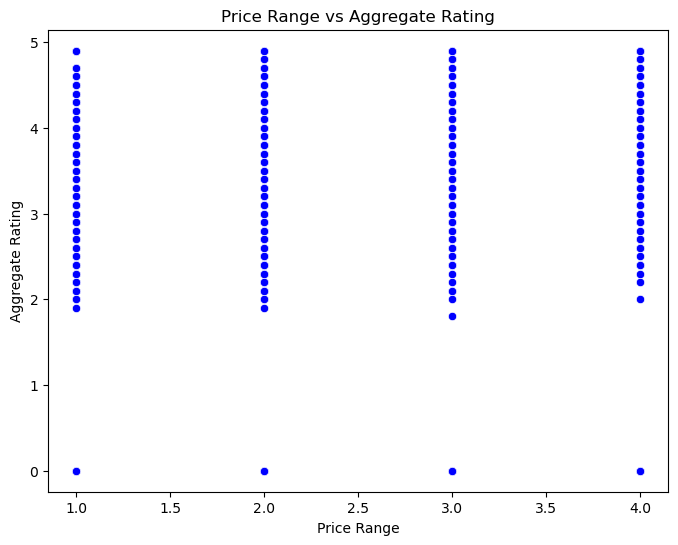

In [41]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Price range'], y=data['Aggregate rating'], color='blue')
plt.title('Price Range vs Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()


Cuisines vs Aggregate Rating: 

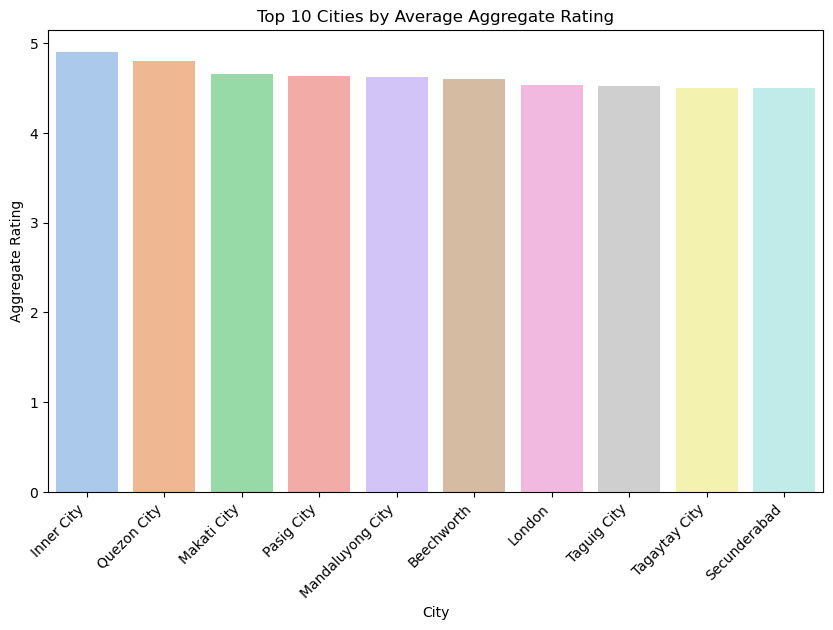

In [52]:
# Example: City vs Average Aggregate Rating
avg_ratings_city = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
top_10_cities = avg_ratings_city.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='pastel')
plt.title('Top 10 Cities by Average Aggregate Rating')
plt.xlabel('City')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45, ha='right')
plt.show()



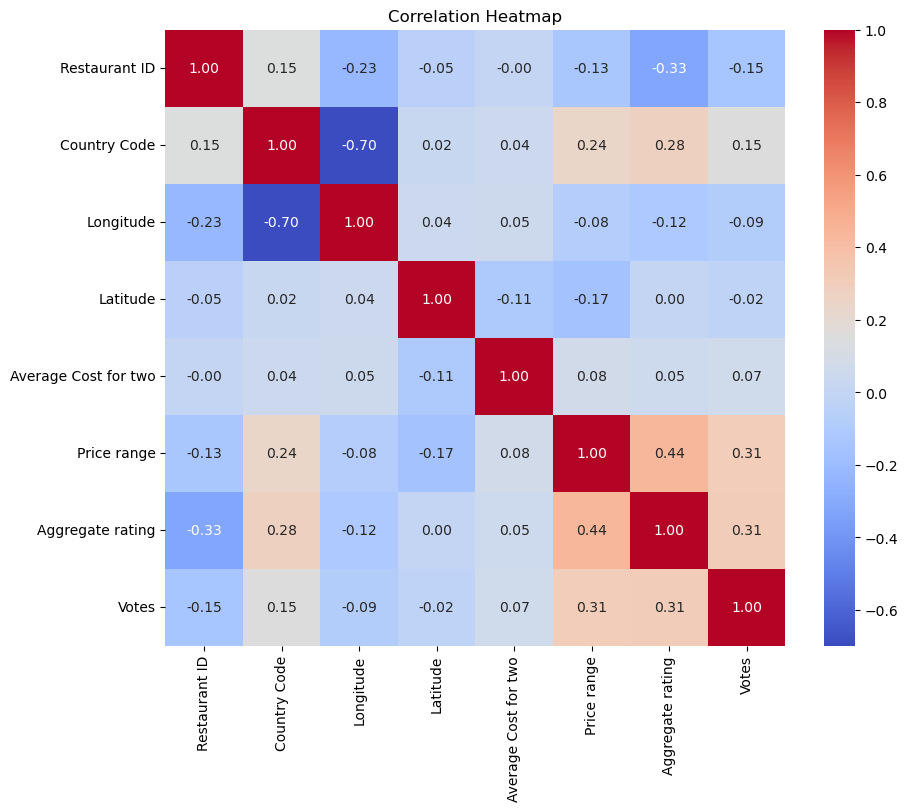

In [50]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
numerical_features = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()
